In [3]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data
df = pd.read_csv("/content/ma_data.csv")
df.head()


,acquirer_revenue,target_revenue,deal_value,industry_match,market_sentiment,prior_deals_acquirer,success
0,1935.246582,596.142140,2101.028413,0,-0.426961,16,0
1,4758.500101,1648.607795,1983.360605,0,0.605281,27,1
2,3686.770315,2625.190216,7250.974098,0,0.994476,8,0
3,3033.426573,2210.063415,2003.874137,1,-0.939948,1,0
4,864.491338,2429.355386,2182.878312,0,0.794732,24,1


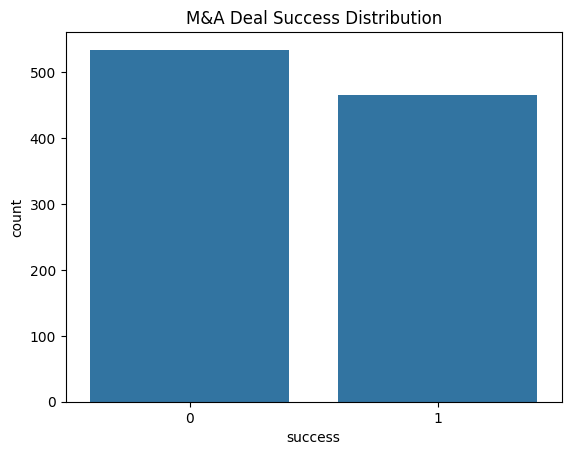

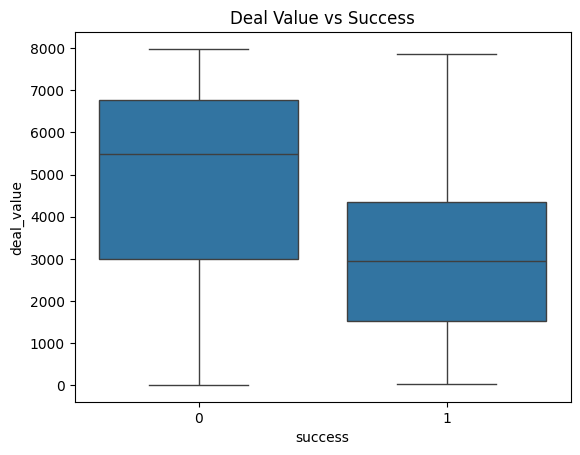

In [4]:
# 3. EDA
sns.countplot(data=df, x="success")
plt.title("M&A Deal Success Distribution")
plt.show()

sns.boxplot(x="success", y="deal_value", data=df)
plt.title("Deal Value vs Success")
plt.show()

In [5]:
# 4. Prepare Features
X = df.drop("success", axis=1)
y = df["success"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 5. Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.99      0.99      0.99        95

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

ROC AUC Score: 0.9968421052631579


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


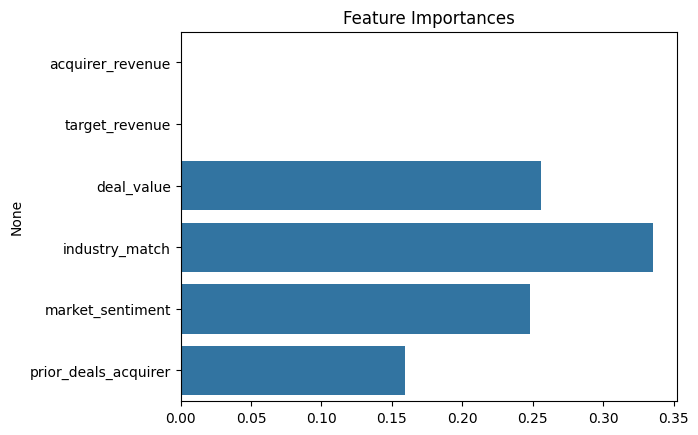

In [7]:
# 6. Feature Importance
importances = model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()


In [9]:
# 7. Save model
joblib.dump(model, "ma_model.pkl")
print("✅ Model saved to ma_model.pkl")


✅ Model saved to ma_model.pkl
